In [78]:
seed = 9

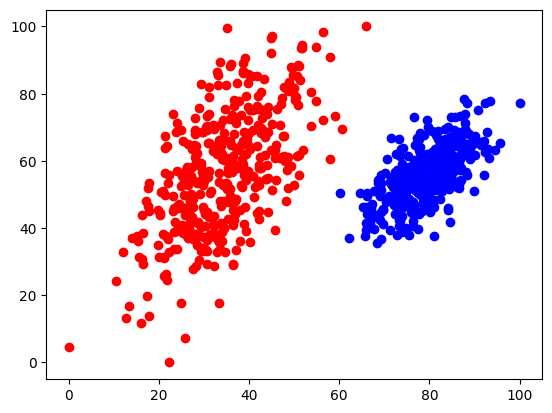

In [79]:
import re
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


"""Generate X and y data based on the specified data type."""
X, y = make_classification(
    n_samples=800,
    n_features=2,
    n_informative=2,
    n_redundant=0,  # no redundant features
    n_clusters_per_class=1,  # each class is a single cluster
    flip_y=0,  # no noise
    shuffle=True,
    random_state=seed,
    n_classes=2,
    class_sep=2.5,  # make classes clearly separable
)

# Normalize X to [0, 1] and then scale to [0, 100]
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X = 100 * (X - X_min) / (X_max - X_min)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")
plt.show()

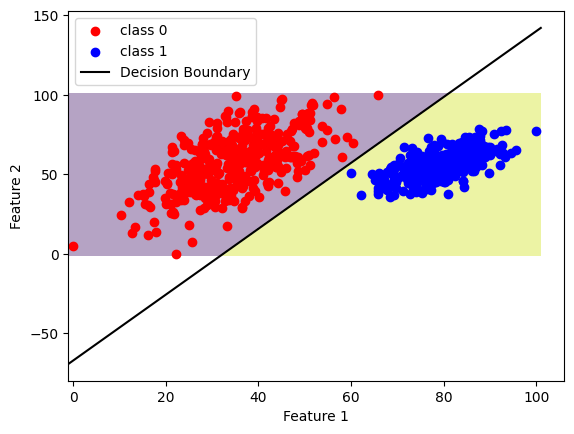

Decision Boundary Equation: -0.37y + 0.77x + -24.93 = 0


In [80]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
# Fit logistic regression
clf = LogisticRegression(random_state=seed).fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the function value for the whole grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
# plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")

# Plot the decision boundary
w = clf.coef_[0]
b = clf.intercept_[0]
x_boundary = np.array([x_min, x_max])
y_boundary = -(w[0] * x_boundary + b) / w[1]
plt.plot(x_boundary, y_boundary, 'k-', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Print the equation of the decision boundary
print(f"Decision Boundary Equation: {w[1]:.2f}y + {w[0]:.2f}x + {b:.2f} = 0")

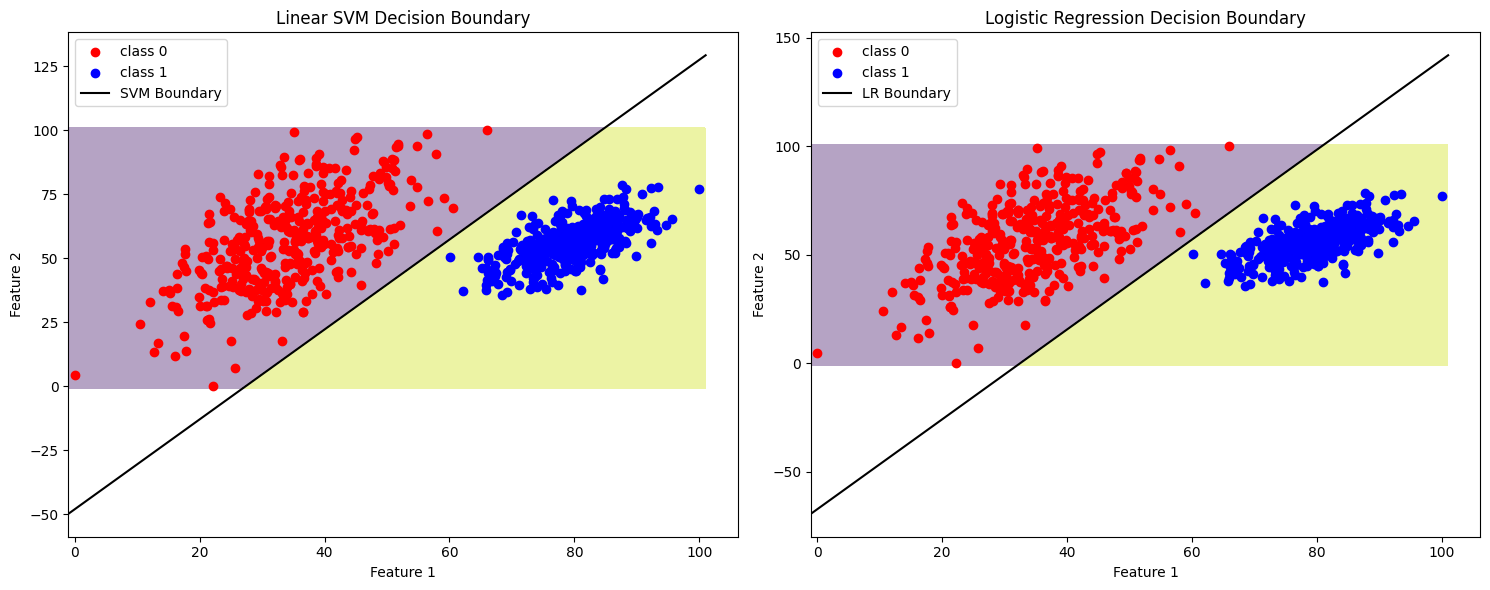

SVM Decision Boundary: -0.14y + 0.25x + -6.98 = 0
LR Decision Boundary: -0.37y + 0.77x + -24.93 = 0


In [81]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit Linear SVM
svm = SVC(kernel='linear', C=1.0, random_state=seed).fit(X, y)

# Fit Logistic Regression for comparison
lr = LogisticRegression(random_state=seed).fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the function value for the whole grid
Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(15, 6))

# SVM plot
plt.subplot(121)
plt.contourf(xx, yy, Z_svm, alpha=0.4)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")

# Plot SVM decision boundary
w = svm.coef_[0]
b = svm.intercept_[0]
x_boundary = np.array([x_min, x_max])
y_boundary = -(w[0] * x_boundary + b) / w[1]
plt.plot(x_boundary, y_boundary, 'k-', label='SVM Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
plt.legend()

# Logistic Regression plot
plt.subplot(122)
plt.contourf(xx, yy, Z_lr, alpha=0.4)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")

# Plot Logistic Regression decision boundary
w_lr = lr.coef_[0]
b_lr = lr.intercept_[0]
x_boundary_lr = np.array([x_min, x_max])
y_boundary_lr = -(w_lr[0] * x_boundary_lr + b_lr) / w_lr[1]
plt.plot(x_boundary_lr, y_boundary_lr, 'k-', label='LR Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.tight_layout()
plt.show()

# Print the equations of the decision boundaries
print(f"SVM Decision Boundary: {w[1]:.2f}y + {w[0]:.2f}x + {b:.2f} = 0")
print(f"LR Decision Boundary: {w_lr[1]:.2f}y + {w_lr[0]:.2f}x + {b_lr:.2f} = 0")

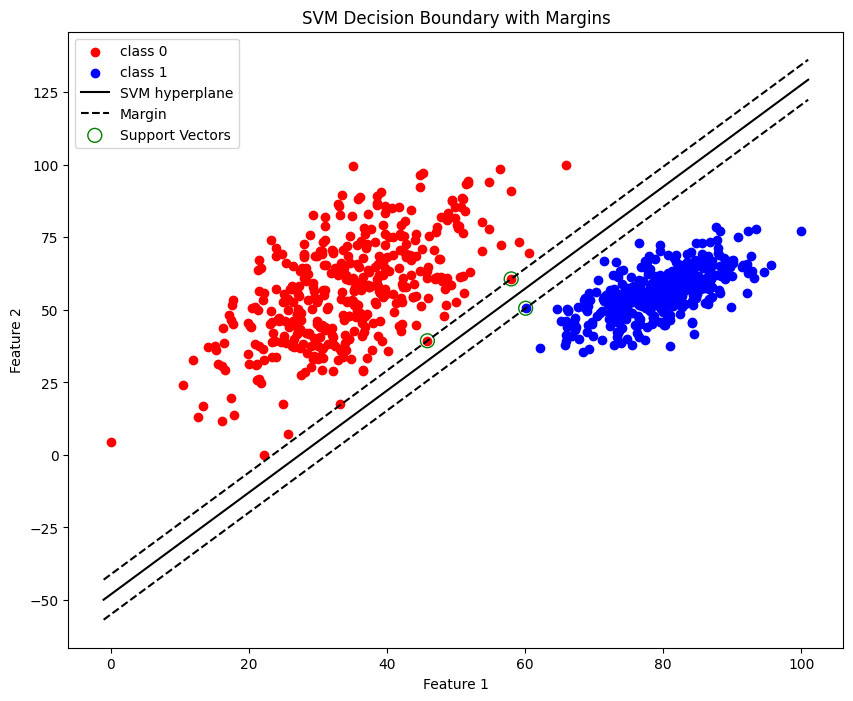

Margin width: 6.8233


In [82]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Fit SVM
svm = SVC(kernel='linear', C=1.0, random_state=seed)
svm.fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
a = -w[0] / w[1]

# Points on the separating hyperplane
xx_hyperplane = np.linspace(x_min, x_max)
yy_hyperplane = a * xx_hyperplane - (b) / w[1]

# Points on the margin boundaries
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_pos_margin = a * xx_hyperplane - (b - 1) / w[1]
yy_neg_margin = a * xx_hyperplane - (b + 1) / w[1]

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")

# Plot the hyperplane
plt.plot(xx_hyperplane, yy_hyperplane, 'k-', label='SVM hyperplane')
plt.plot(xx_hyperplane, yy_pos_margin, 'k--', label='Margin')
plt.plot(xx_hyperplane, yy_neg_margin, 'k--')

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='green', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Margins')
plt.legend()
plt.show()

print(f"Margin width: {2*margin:.4f}")

[ 0.25474605 -0.14498588] -6.978485451036277


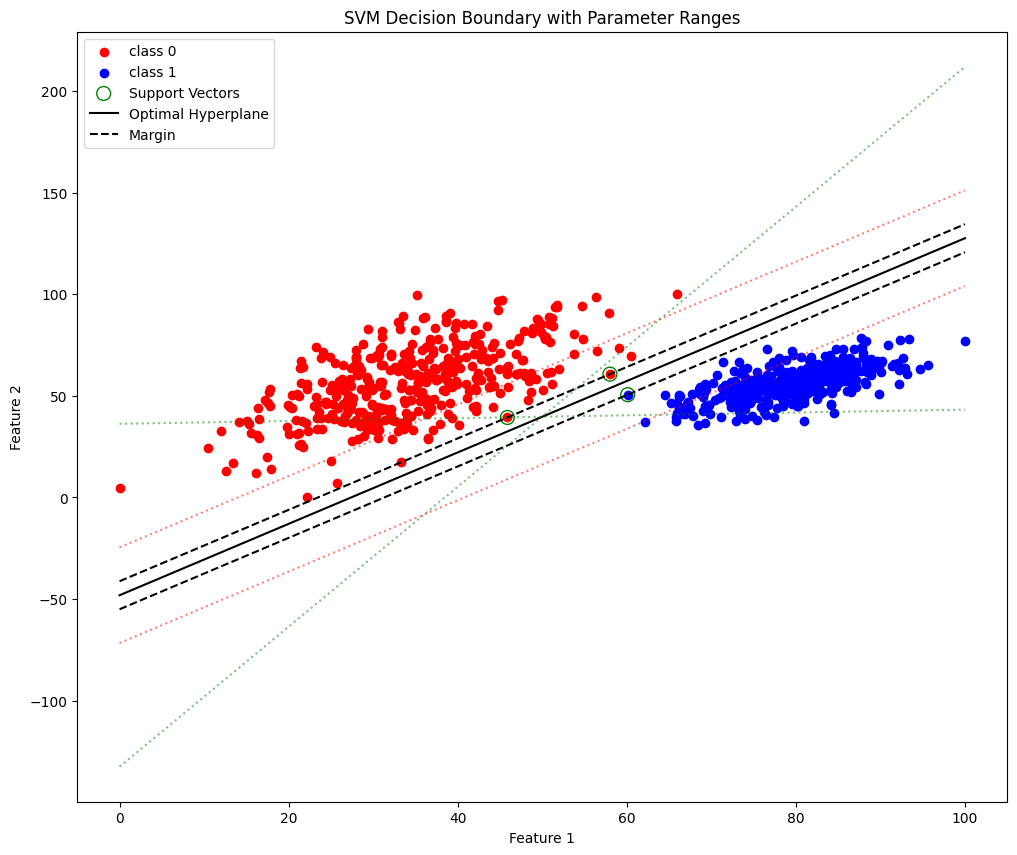

Optimal intercept: -48.1322
Range of valid intercepts: [-51.5438, -44.7205]
Optimal slope: 1.7570
Range of valid slopes: [0.0695, 3.4446]


In [89]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Fit SVM
svm = SVC(kernel='linear', C=1.0, random_state=seed)
svm.fit(X, y)

# Get the SVM parameters
w = svm.coef_[0]
b = svm.intercept_[0]
print(w, b)

# Get support vectors
support_vectors = svm.support_vectors_

# Function to compute the distance of a point from the decision boundary
def distance_to_boundary(x, y, w, b):
    return abs(w[0]*x + w[1]*y + b) / np.sqrt(w[0]**2 + w[1]**2)

# Compute the margin
margin = 1 / np.sqrt(np.sum(w**2))

# Compute the range of valid intercepts
intercept = -b / w[1]
intercept_range = np.array([intercept - margin, intercept + margin])
# b_range = np.array([b - margin, b + margin])

# Compute the range of valid slopes
slope = -w[0] / w[1]
slope_range = np.array([
    slope - margin / np.sqrt(1 + slope**2),
    slope + margin / np.sqrt(1 + slope**2)
])

# Plot
plt.figure(figsize=(12, 10))

# Plot data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=100, facecolors='none', edgecolors='green', label='Support Vectors')

# Plot the optimal hyperplane
x_range = np.array([X[:, 0].min(), X[:, 0].max()])
plt.plot(x_range, -(w[0]*x_range + b) / w[1], 'k-', label='Optimal Hyperplane')

# Plot the margin boundaries
plt.plot(x_range, -(w[0]*x_range + b - 1) / w[1], 'k--', label='Margin')
plt.plot(x_range, -(w[0]*x_range + b + 1) / w[1], 'k--')

# Plot the range of valid hyperplanes
for b_val in b_range:
    plt.plot(x_range, -(w[0]*x_range + b_val) / w[1], 'r:', alpha=0.5)

for slope_val in slope_range:
    y_range = slope_val * (x_range - np.mean(x_range)) - (w[0]*np.mean(x_range) + b) / w[1]
    plt.plot(x_range, y_range, 'g:', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Parameter Ranges')
plt.legend()
plt.show()

print(f"Optimal intercept: {intercept:.4f}")
print(f"Range of valid intercepts: [{intercept_range[0]:.4f}, {intercept_range[1]:.4f}]")
print(f"Optimal slope: {slope:.4f}")
print(f"Range of valid slopes: [{slope_range[0]:.4f}, {slope_range[1]:.4f}]")

Angle between lines: 3.88 degrees
Cosine similarity: 0.9977
Average Euclidean distance: 15.7123


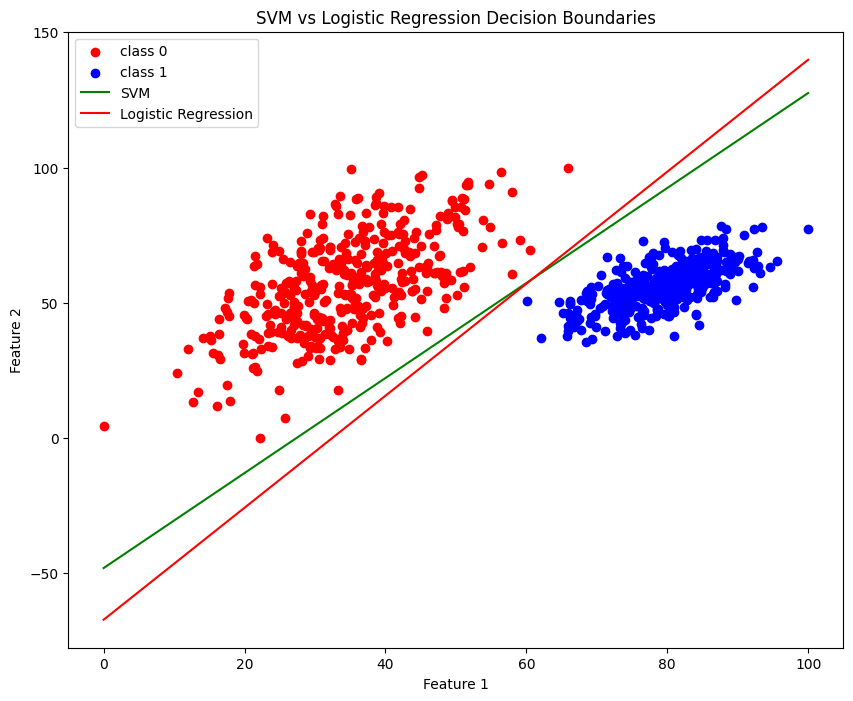

In [90]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Fit SVM and Logistic Regression
svm = SVC(kernel='linear', C=1.0, random_state=0).fit(X, y)
lr = LogisticRegression(random_state=0).fit(X, y)

# Extract coefficients and intercepts
w_svm, b_svm = svm.coef_[0], svm.intercept_[0]
w_lr, b_lr = lr.coef_[0], lr.intercept_[0]

# Function to compute angle between two lines
def angle_between_lines(a1, b1, a2, b2):
    # Convert to slope-intercept form
    m1, m2 = -a1/b1, -a2/b2
    angle = np.abs(np.arctan((m1 - m2) / (1 + m1*m2)))
    return np.degrees(angle)

# Function to compute cosine similarity
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Function to compute Euclidean distance between points on the lines
def euclidean_distance(a1, b1, c1, a2, b2, c2, x_range):
    y1 = (-a1*x_range - c1) / b1
    y2 = (-a2*x_range - c2) / b2
    return np.mean(np.sqrt((x_range - x_range)**2 + (y1 - y2)**2))

# Compute similarities
angle = angle_between_lines(w_svm[0], w_svm[1], w_lr[0], w_lr[1])
cosine_sim = cosine_similarity(w_svm, w_lr)
x_range = np.array([X[:, 0].min(), X[:, 0].max()])
euclidean_dist = euclidean_distance(w_svm[0], w_svm[1], b_svm, w_lr[0], w_lr[1], b_lr, x_range)

print(f"Angle between lines: {angle:.2f} degrees")
print(f"Cosine similarity: {cosine_sim:.4f}")
print(f"Average Euclidean distance: {euclidean_dist:.4f}")

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker="o", label="class 1")

# Plot SVM decision boundary
x_range = np.array([X[:, 0].min(), X[:, 0].max()])
plt.plot(x_range, -(w_svm[0]*x_range + b_svm) / w_svm[1], 'g-', label='SVM')

# Plot Logistic Regression decision boundary
plt.plot(x_range, -(w_lr[0]*x_range + b_lr) / w_lr[1], 'r-', label='Logistic Regression')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM vs Logistic Regression Decision Boundaries')
plt.legend()
plt.show()